# Install Dependencies

In [1]:
# install dependencies
# %pip uninstall opencv-python
%pip install numpy
%pip install matplotlib
%pip install Pillow
%pip install pytesseract
%pip install opencv-contrib-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Obtaining dependency information for opencv-contrib-python from https://files.pythonhosted.org/packages/81/3c/bbb3ceee9fbefc505f98c24dafda68c7b3c4f83b6951c0712b4623fe4cce/opencv_contrib_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata
  Using cached opencv_contrib_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_contrib_python-4.8.1.78-cp37-abi3-win_amd64.whl (44.8 MB)


In [37]:
%pip install tensorflow pandas

^C
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata (3.6 kB)
  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/11/17/fb1a34f3e73debbc2fd15a01ea17eaab3717943d08463ff4979a4f024b3f/pandas-2.1.4-cp311-cp311-win_amd64.whl.metadata
  Using cached pandas-2.1.4-cp311-cp311-win_amd64.whl.metadata (18 kB)
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata (5.1 kB)
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc

# Membuat custom model dari pretrained model gunting kertas batu menggunakan dataset custom untuk mengklasifikasi rank MLBB

In [9]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [10]:
train_path="images/rank/train"
test_path="images/rank/test"
val_path="images/rank/val"
x_train=[]

for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_train.append(img_arr)

x_test=[]

for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_test.append(img_arr)

x_val=[]

for folder in os.listdir(val_path):

    sub_path=val_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_val.append(img_arr)

In [11]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)
train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')




Found 18 images belonging to 3 classes.
Found 3 images belonging to 3 classes.
Found 6 images belonging to 3 classes.


In [13]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes


In [14]:
training_set.class_indices
train_y.shape,test_y.shape,val_y.shape

((18,), (3,), (6,))

In [15]:
vgg = VGG19(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
#do not train the pre-trained layers of VGG-19
for layer in vgg.layers:
    layer.trainable = False

In [16]:
x = Flatten()(vgg.output)
#adding output layer.Softmax classifier is used as it is multi-class classification
prediction = Dense(3, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

In [17]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [18]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [19]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model

In [20]:
# fit the model
history = model.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=10,
  callbacks=[early_stop],
  batch_size=32,shuffle=True)

Epoch 1/10


1/1 [==============================] - 6s 6s/step - loss: 1.2428 - accuracy: 0.5556 - val_loss: 2.9062 - val_accuracy: 0.3333
Epoch 2/10
1/1 [==============================] - 3s 3s/step - loss: 2.7490 - accuracy: 0.3333 - val_loss: 0.6833 - val_accuracy: 0.6667
Epoch 3/10
1/1 [==============================] - 3s 3s/step - loss: 0.5452 - accuracy: 0.7778 - val_loss: 0.6781 - val_accuracy: 0.6667
Epoch 4/10
1/1 [==============================] - 2s 2s/step - loss: 0.6604 - accuracy: 0.6667 - val_loss: 0.9138 - val_accuracy: 0.6667
Epoch 5/10
1/1 [==============================] - 2s 2s/step - loss: 0.7882 - accuracy: 0.6667 - val_loss: 0.7861 - val_accuracy: 0.8333
Epoch 6/10
1/1 [==============================] - 2s 2s/step - loss: 0.5989 - accuracy: 0.7778 - val_loss: 0.4104 - val_accuracy: 0.8333
Epoch 7/10
1/1 [==============================] - 2s 2s/step - loss: 0.2421 - accuracy: 0.9444 - val_loss: 0.1255 - val_accuracy: 1.0000
Epoch 8/10
1/1 [=======================

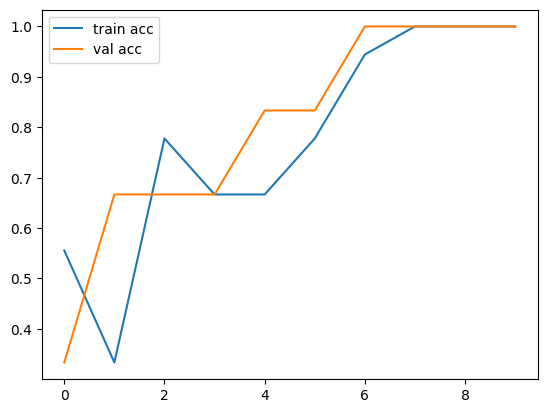

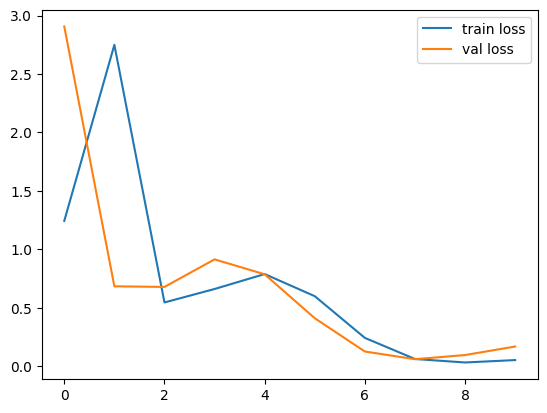

In [21]:
# accuracies

plt.plot(history.history['accuracy'], label='train acc')

plt.plot(history.history['val_accuracy'], label='val acc')

plt.legend()


plt.show()
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

In [22]:
model.evaluate(test_x,test_y,batch_size=32)


1/1 [==============================] - 0s 410ms/step - loss: 0.2446 - accuracy: 1.0000


[0.24458712339401245, 1.0]

# FUNGSI UNTUK MENDAPATKAN INFROMASI AKUN

In [23]:
import cv2
from cv2 import dnn_superres
import numpy as np
import pytesseract
pytesseract.pytesseract.tesseract_cmd = "C:/Program Files/Tesseract-OCR/tesseract.exe"

def getText(img, r):
    # potong gambar sesuai dengan bounding box
    imCrop = img[int(r[1]):int(r[1]+r[3]), int(r[0]):int(r[0]+r[2])]

    # resize image 
    originalImage = cv2.resize(imCrop, (0,0), fx=3, fy=3)

    # gray = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)

    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])

    sharpenedImage = cv2.filter2D(originalImage, -1, kernel)



    gray = cv2.cvtColor(sharpenedImage, cv2.COLOR_BGR2GRAY)
    res, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

    #     # buat perbandingan antara gambar asli dan gambar yang sudah di sharpen secara horizontal
    # im_v = cv2.hconcat([gray, thresh1])
    # cv2.imshow("horizontal", im_v)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

    # cv2.imshow("thresh1", thresh1)

    # # get text from image
    text = pytesseract.image_to_string(thresh1, lang='eng', config='--psm 6')

    # # ====================================================================================================

    # boxes = pytesseract.image_to_boxes(thresh1, lang='eng', config='--psm 6')

    # # # draw bounding boxes
    # for b in boxes.splitlines():
    #     b = b.split(' ')
    #     img = cv2.rectangle(thresh1, (int(b[1]), int(b[2])), (int(b[3]), int(b[4])), (0, 255, 0), 1)
    #     img = cv2.putText(img, b[0], (int(b[1]), int(b[2])), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

    # # # show image
    # cv2.imshow('img', img)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

    # ====================================================================================================

    # imCrop = img[int(r[1]):int(r[1]+r[3]), int(r[0]):int(r[0]+r[2])]

    # # resize image
    # originalImage = sr.upsample(img=imCrop)

    # # convert to grayscale
    # gray = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)

    # # do local thresholding
    # gray = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 2)

    # # invert the image
    # gray = cv2.bitwise_not(gray)

    # # crop the image to remove noise
    # gray = gray[5:gray.shape[0]-5, 5:gray.shape[1]-5]

    # # perform text extraction
    # text = pytesseract.image_to_string(gray, lang='eng', config='--psm 11 --oem 3')

    return text

In [29]:

import cv2
import numpy as np

def detect_rank(img, r):
    
    imCrop = img[int(r[1]):int(r[1]+r[3]), int(r[0]):int(r[0]+r[2])]

    img_arr=cv2.resize(imCrop,(224,224))

    # img_arr=img_arr/255.0

    img_arr=np.expand_dims(img_arr,axis=0)

    y_pred=model.predict(img_arr)

    y_pred=np.argmax(y_pred,axis=1)

    if y_pred==0:
        return "Epic"
    elif y_pred==1:
        return "Legend"
    else:
        return "Mythic"

In [34]:
import cv2


# get all files in inputs folder
import os

# inputs = os.listdir("images/input")

# for input in inputs:
#     # read image
#     img = cv2.imread("images/input/" + input)

#     # cv2.imshow("img", img)

#     print(f'Nick = {getText(img, (288, 68, 186, 31))}')
#     print(f'Server = {getText(img, (291, 98, 177, 25))}')
#     print(f'Level = {getText(img, (322, 125, 33, 24))}')
#     print(f'Lokasi = {getText(img, (232, 161, 195, 28))}')
#     print(f'Squad = {getText(img, (234, 188, 224, 22))}')
#     print(f'Total Hero = {getText(img, (549, 439, 28, 21))}')
#     print(f'Total Skin = {getText(img, (607, 437, 27, 25))}')
#     print(f'Total Pertandingan = {getText(img, (605, 496, 44, 24))}')


#     rRank = (211, 236, 58, 65)
#     rTertinggi = (389, 232, 60, 65)

#     print(f'rank Saai ini = {detect_rank(img, rRank)}')
#     print(f'rank tertinggi = {detect_rank(img, rTertinggi)}')

# input citra
img = cv2.imread("images/input/14.jpg")

    # cv2.imshow("img", img)

print(f'Nick = {getText(img, (288, 68, 186, 31))}')
print(f'Server = {getText(img, (291, 98, 177, 25))}')
print(f'Level = {getText(img, (322, 125, 33, 24))}')
print(f'Lokasi = {getText(img, (232, 161, 195, 28))}')
print(f'Squad = {getText(img, (234, 188, 224, 22))}')
print(f'Total Hero = {getText(img, (549, 439, 28, 21))}')
print(f'Total Skin = {getText(img, (607, 437, 27, 25))}')
print(f'Total Pertandingan = {getText(img, (605, 496, 44, 24))}')


rRank = (211, 236, 58, 65)
rTertinggi = (389, 232, 60, 65)

print(f'rank Saai ini = {detect_rank(img, rRank)}')
print(f'rank tertinggi = {detect_rank(img, rTertinggi)}')



Nick = Pigman.

Server = Server, 2640

Level = 52

Lokasi = Indonesia/Lampung

Squad = NSNV NoScirficeNovVetr

Total Hero = 89

Total Skin = 86

Total Pertandingan = 5792

1/1 [==============================] - 0s 208ms/step
rank Saai ini = Epic
1/1 [==============================] - 0s 231ms/step
rank tertinggi = Legend
